# Intrusion Detection System

[mudgalabhay](github.com/mudgalabhay/intrusion-detection-system/blob/master/main.ipynb)

## Import modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'dataset', 'intrusion_detection_system.ipynb', 'kddcup.data_10_percent.gz']


In [3]:
with open("dataset\kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns = []
for c in cols.split(','):
    if (c.strip()):
        columns.append(c.strip())
        
columns.append('target')
# print(columns)
print(len(columns))

42


In [5]:
with open('dataset/training_attack_types', 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [6]:
attack_types = {
    "normal" : "normal",
    "back" : "dos",
    "buffer_overflow" : "u2r",
    "ftp_write" : "r2l",
    "guess_passwd" : "r2l",
    "imap" : "r2l",
    "ipsweep" : "probe",
    "land" : "dos",
    "loadmodule" : "u2r",
    "multihop" : "r2l",
    "neptune" : "dos",
    "nmap" : "probe",
    "perl" : "u2r",
    "phf" : "r2l",
    "pod" : "dos",
    "portsweep" : "probe",
    "rootkit" : "u2r",
    "satan" : "probe",
    "smurf" : "dos",
    "spy" : "r2l",
    "teardrop" : "dos",
    "warezclient" : "r2l",
    "warezmaster" : "r2l"   
}

## Reading dataset

In [8]:
path = 'dataset/kddcup.data_10_percent.gz'
df = pd.read_csv(path, names=columns)

# Adding attack type columns
df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [9]:
df.shape

(494021, 43)

In [10]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [11]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [12]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

## Data Preprocessing

In [13]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
# Find categorical features
num_cols = df._get_numeric_data().columns

categorical_cols = list(set(df.columns) - set(num_cols))
categorical_cols.remove('target')
categorical_cols.remove('Attack Type')

categorical_cols

['flag', 'protocol_type', 'service']

## Categorical Features Distribution

In [24]:
## Visualization
def bar_graph(feature, figsize=(8,6)):
    df[feature].value_counts().plot(kind='bar', figsize=figsize)

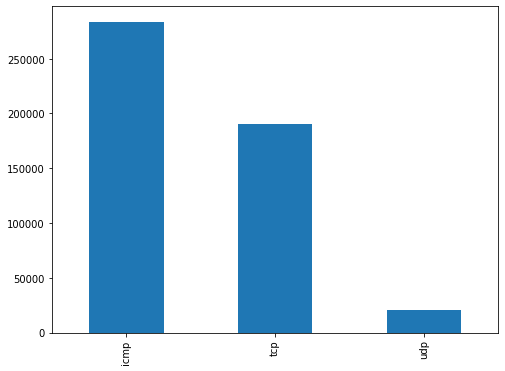

In [25]:
plt.figure(figsize=(8,6))
bar_graph('protocol_type')

Packet occurrence icmp > tcp > udp

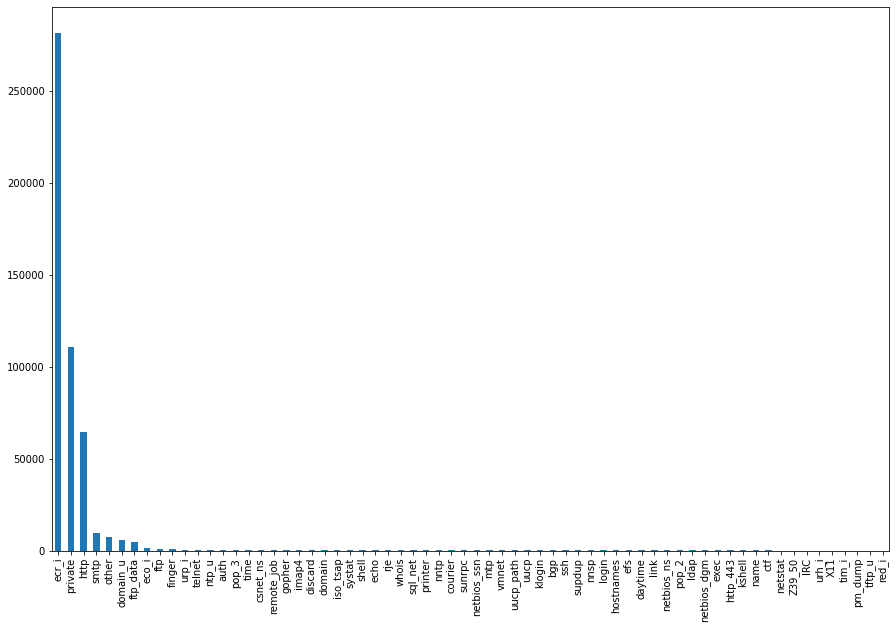

In [27]:
bar_graph('service', figsize=(15,10))

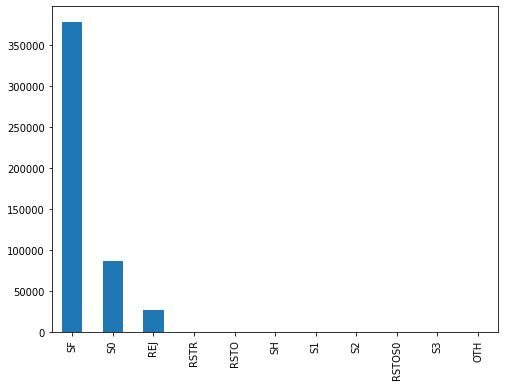

In [28]:
bar_graph('flag')

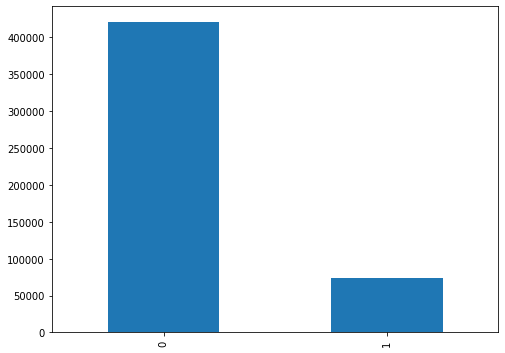

In [30]:
bar_graph("logged_in")

1 : Successfully logged in
0 : Failed logged in

About 70k packet successfully logged in

## Target Feature Distributions

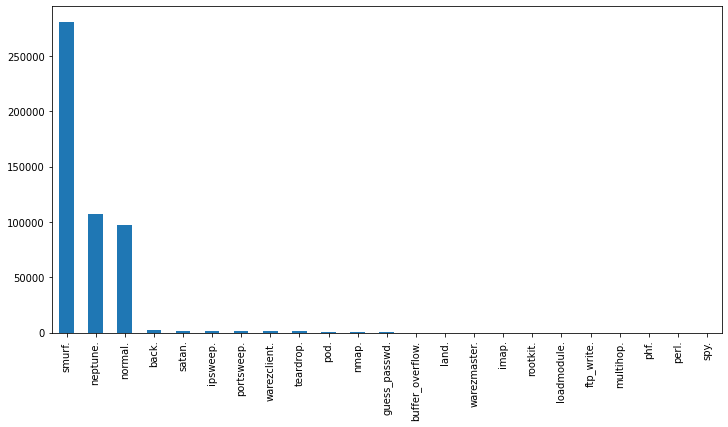

In [32]:
bar_graph('target', (12,6))

## Attack Type

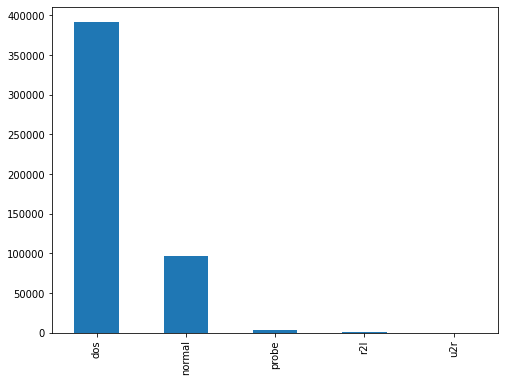

In [33]:
bar_graph('Attack Type')

In [35]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

## Data Correlation

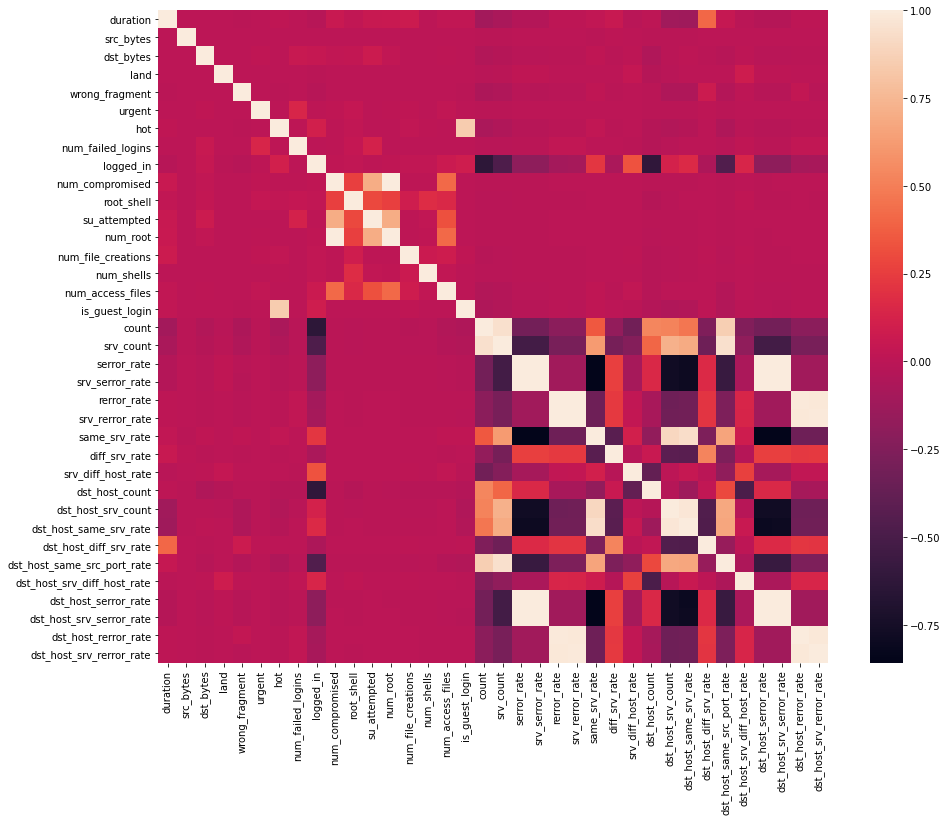

In [38]:
df = df.dropna()

df = df[[col for col in df if df[col].nunique() > 1]] # Keep columns with more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr)

plt.show()

In [39]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737942

In [40]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272552

In [41]:
df['srv_count'].corr(df['count'])

0.9436670688882602

In [42]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818258

In [43]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572954081

In [44]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173372515

In [45]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110593

In [47]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.927808034269101

In [48]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324231

In [49]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783239

In [50]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.998672968010501

In [51]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373953

In [52]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679238

In [53]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850208

In [56]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308904

In [57]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751091

In [58]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845588

In [59]:
## This variable below is highly correlated each other and should be ignored for analysis
df.drop('num_root', axis=1, inplace=True)
df.drop('srv_serror_rate', axis=1, inplace=True)
df.drop('srv_rerror_rate', axis=1, inplace=True)
df.drop('dst_host_srv_serror_rate', axis=1, inplace=True)
df.drop('dst_host_serror_rate', axis=1, inplace=True)
df.drop('dst_host_rerror_rate', axis=1, inplace=True)
df.drop('dst_host_srv_rerror_rate', axis=1, inplace=True)
df.drop('dst_host_same_srv_rate', axis=1, inplace=True)

In [60]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [61]:
df.shape

(494021, 33)

In [62]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [63]:
df_std = df.std()
df_std = df_std.sort_values(ascending=True)
df_std

<ipython-input-63-31cbdde0e293>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

## Feature Mapping

In [64]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [65]:
# Protocol_type feature mapping
pmap = {'icmp': 0, 'tcp': 1, 'udp': 2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [66]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [67]:
# Flag feature mapping
fmap = {'SF': 0, 'S0': 1,
        'REJ': 2, 'RSTR': 2,
        'RSTO': 4, 'SH': 5,
        'S1': 6, 'S2': 7,
        "RST0S0": 8, 'S3': 9,
        "OTH": 10
       }

df['flag'] = df['flag'].map(fmap)

In [68]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0.0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0.0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0.0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0.0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0.0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [71]:
df.flag.value_counts()

0.0     378440
1.0      87007
2.0      27778
4.0        579
5.0        107
6.0         57
7.0         24
9.0         10
10.0         8
Name: flag, dtype: int64

In [72]:
df.drop('service', axis=1, inplace=True)

In [73]:
df.shape

(494021, 32)

In [74]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0.0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0.0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0.0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0.0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0.0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [75]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                           float64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

## Modeling

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [91]:
df.isna().sum()

duration                        0
protocol_type                   0
flag                           11
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
urgent                          0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_file_creations              0
num_shells                      0
num_access_files                0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
rerror_rate                     0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count                  0
dst_host_srv_count              0
dst_host_diff_srv_rate          0
dst_host_same_src_port_rate     0
dst_host_srv_d

In [94]:
df.dropna(inplace=True)

In [95]:
df.isna().sum()

duration                       0
protocol_type                  0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
rerror_rate                    0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
Attack Typ

In [97]:
df = df.drop(['target'], axis=1)
print(df.shape)

# Target variable and training set
y = df[['Attack Type']]
X = df.drop(['Attack Type'], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(395208, 30) (98802, 30)
(395208, 1) (98802, 1)


### Gaussian Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
model_1 = GaussianNB()

In [100]:
start_time = time.time()
model_1.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [101]:
print("Training time:", end_time - start_time)

Training time: 1.715665578842163


In [102]:
start_time = time.time()
y_test_pred_1 = model_1.predict(X_test)
end_time = time.time()

In [103]:
print("testing time", end_time - start_time)

testing time 0.3343496322631836


In [104]:
print("Train score:", model_1.score(X_train, y_train))
print("Test score:", model_1.score(X_test, y_test))

Train score: 0.8813384344446469
Test score: 0.8816015870124086


### Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [107]:
start_time = time.time()
model_2.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [108]:
print("Training time:", end_time - start_time)

Training time: 2.8640618324279785


In [109]:
start_time = time.time()
y_test_pred_2 = model_2.predict(X_test)
end_time = time.time()

In [110]:
print("testing time", end_time - start_time)

testing time 0.03789877891540527


In [111]:
print("Train score:", model_2.score(X_train, y_train))
print("Test score:", model_2.score(X_test, y_test))

Train score: 0.9905695228841521
Test score: 0.9906277200866379


## Model Functions

In [121]:
def train_model(model):
    start_time = time.time()
    model.fit(X_train, y_train.values.ravel())
    end_time = time.time()
    print("Training time:", end_time - start_time)
    return model
    
def test_model(model):
    start_time = time.time()
    y_test_pred = model.predict(X_test)
    end_time = time.time()
    print("testing time", end_time - start_time)
    return y_test_pred
    
def score_model(model):
    print("Train score:", model.score(X_train, y_train))
    print("Test score:", model.score(X_test, y_test))

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
model_3 = RandomForestClassifier(n_estimators=30)

In [124]:
model_3 = train_model(model_3)

Training time: 21.10207462310791


In [125]:
y_test_pred_3 = test_model(model_3)

testing time 0.6094017028808594


In [126]:
score_model(model_3)

Train score: 0.9999721665553329
Test score: 0.9996255136535698


### Support Vector Machine

In [129]:
from sklearn.svm import SVC

In [130]:
model_4 = SVC(gamma='scale')

In [131]:
model_4 = train_model(model_4)

Training time: 362.63587379455566


In [132]:
y_test_pred_4 = test_model(model_4)

testing time 48.01533794403076


In [133]:
score_model(model_4)

Train score: 0.9987905103135564
Test score: 0.9987449646768284


### Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
model_5 = LogisticRegression(max_iter=1200000)

In [136]:
model_5 = train_model(model_5)

Training time: 103.98110795021057


In [137]:
y_test_pred_5 = test_model(model_5)

testing time 0.03403615951538086


In [138]:
score_model(model_5)

Train score: 0.9941018400437238
Test score: 0.994089188477966


### Gradient Boosting Classifier

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
model_6 = GradientBoostingClassifierdientBoostingClassifier(random_state=42)

In [141]:
model_6 = train_model(model_6)

Training time: 485.1884548664093


In [142]:
y_test_pred_6 = test_model(model_6)

testing time 0.6561410427093506


In [143]:
score_model(model_6)

Train score: 0.998684237161191
Test score: 0.9984818121090666


### Artificial Neural Network

In [144]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

In [145]:
def ann_model():
    model = Sequential()
    
    # 30 output dimension
    model.add(Dense(30, input_dim=30, activation='relu', kernel_initializer='random_uniform'))
    
    # Next layer we don't specify the input dimensions as the model is sequential 
    # Output of previous layer become input to the next layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform'))
    
    # 5 Classess - normal, dos, probe, r2l, u2r
    model.add(Dense(5, activation='softmax'))
    
    # Loss is a categorical crossentropy which specifies that we have multiple classes
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [146]:
model_7 = KerasClassifier(build_fn=ann_model, epochs=100, batch_size=64)

In [147]:
train_model(model_7)

Epoch 1/100
6176/6176 [==============================] - 18s 1ms/step - loss: 0.5103 - accuracy: 0.8521
Epoch 2/100
6176/6176 [==============================] - 7s 1ms/step - loss: 0.0790 - accuracy: 0.9843
Epoch 3/100
6176/6176 [==============================] - 7s 1ms/step - loss: 0.0655 - accuracy: 0.9846
Epoch 4/100
6176/6176 [==============================] - 7s 1ms/step - loss: 0.0607 - accuracy: 0.9849
Epoch 5/100
6176/6176 [==============================] - 7s 1ms/step - loss: 0.0594 - accuracy: 0.9846
Epoch 6/100
6176/6176 [==============================] - 7s 1ms/step - loss: 0.0572 - accuracy: 0.9849
Epoch 7/100
6176/6176 [==============================] - 7s 1ms/step - loss: 0.0566 - accuracy: 0.9846
Epoch 8/100
6176/6176 [==============================] - 7s 1ms/step - loss: 0.0545 - accuracy: 0.9849
Epoch 9/100
6176/6176 [==============================] - 7s 1ms/step - loss: 0.0536 - accuracy: 0.9848
Epoch 10/100
6176/6176 [==============================] - 7s 1ms/step - 

In [148]:
test_model(model_7)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


testing time 1.5052862167358398


array(['probe', 'dos', 'dos', ..., 'dos', 'dos', 'dos'], dtype=object)

In [149]:
y_test_pred_7 = test_model(model_7)

testing time 1.0122199058532715


In [151]:
accuracy_score(y_test, y_test_pred_7)

0.9981174470152426

In [155]:
start_time = time.time()
y_train_pred_7 = model_7.predict(X_train)
end_time = time.time()
print("testing time", end_time - start_time)

testing time 4.068504571914673


In [156]:
accuracy_score(y_train, y_train_pred_7)

0.9982389020465173

## Training Accuracy

<BarContainer object of 7 artists>

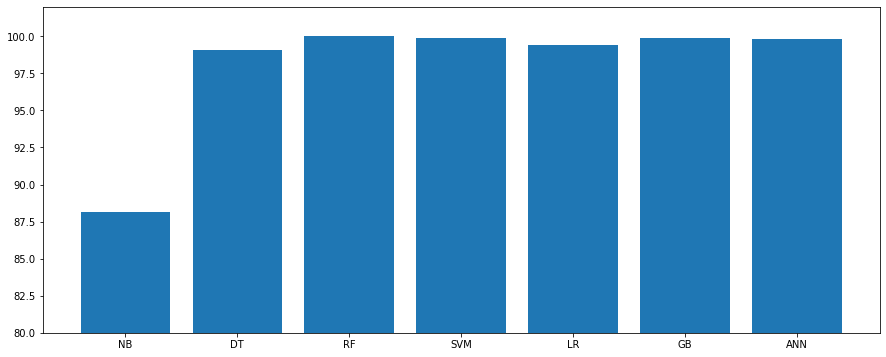

In [157]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
values = [88.13, 99.05, 99.99, 99.87, 99.41, 99.87, 99.82]
f = plt.figure(figsize=(15, 6), num=10)
plt.ylim(80, 102)
plt.bar(names, values)

In [158]:
f.savefig('training_accuracy_figure.png', bbox_inches='tight')

## Testing Accuracy

<BarContainer object of 7 artists>

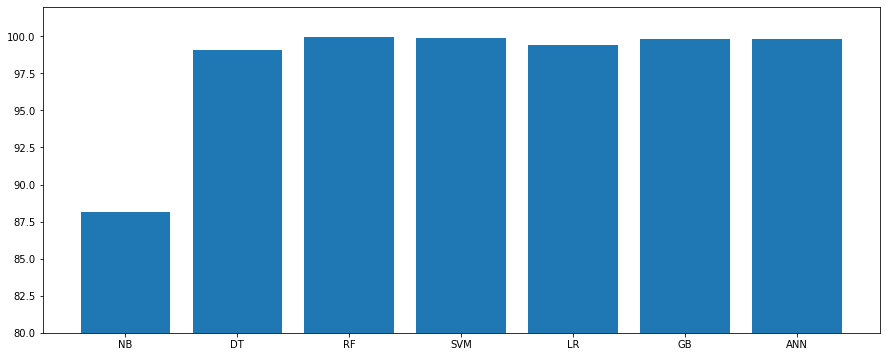

In [159]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
values = [88.16, 99.06, 99.96, 99.87, 99.40, 99.85, 99.81]
f = plt.figure(figsize=(15, 6), num=10)
plt.ylim(80, 102)
plt.bar(names, values)

In [160]:
f.savefig('test_accuracy_figure.png', bbox_inches='tight')

## Training Times

<BarContainer object of 7 artists>

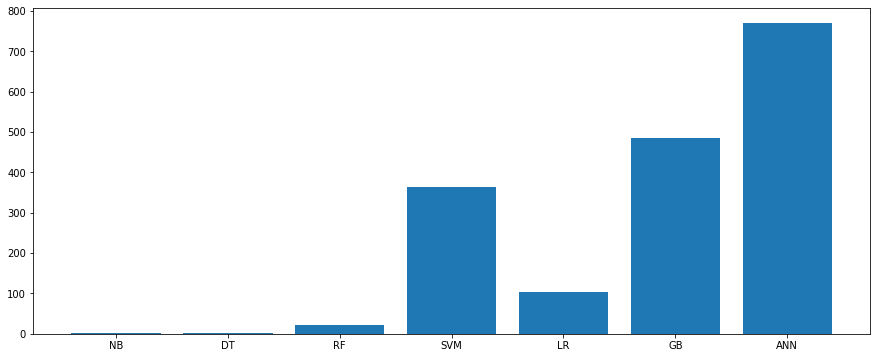

In [164]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
values = [1.715, 2.864, 21.102, 362.636, 103.981, 485.188, 769.412]
f = plt.figure(figsize=(15, 6), num=10)
plt.bar(names, values)

In [162]:
f.savefig("training_time_figure.png", bbox_inches='tight')

## Testing Times

<BarContainer object of 7 artists>

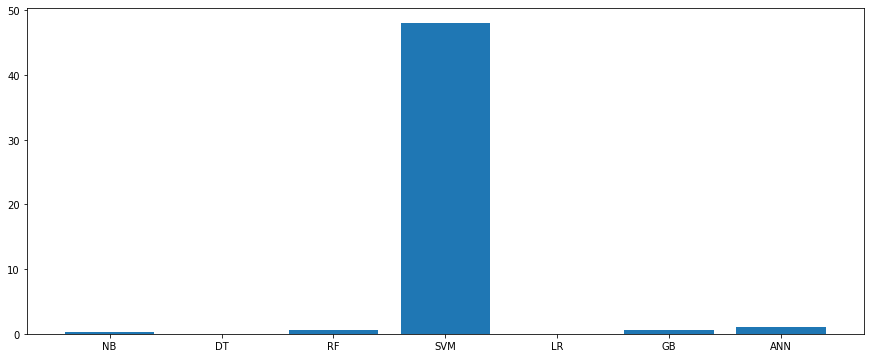

In [165]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
values = [0.334, 0.037, 0.609, 48.015, 0.0340, 0.656, 1.0122]
f = plt.figure(figsize=(15, 6), num=10)
plt.bar(names, values)

In [166]:
f.savefig("testing_time_figure.png", bbox_inches='tight')